# Dara Wrangling II
Create an “Academic performance” dataset of students and perform the following operations using
Python.
1. Scan all variables for missing values and inconsistencies. If there are missing values and/or
inconsistencies, use any of the suitable techniques to deal with them.
2. Scan all numeric variables for outliers. If there are outliers, use any of the suitable techniques to deal
with them.
3. Apply data transformations on at least one of the variables. The purpose of this transformation should
be one of the following reasons: to change the scale for better understanding of the variable, to convert a
non-linear relation into a linear one, or to decrease the skewness and convert the distribution into a
normal distribution.
Reason and document your approach properly.

In [1]:
import numpy as np
import pandas as pd
import random 


In [3]:
student_id = range(1, 101)
student_name = ['Stud ' + str(i) for i in student_id]
age = [random.randint(20, 25) for i in student_id]
total_marks = [random.randint(20, 99) for i in student_id]
gender = [random.choice(['Male', 'Female']) for i in student_id]
division = [random.choice(['A', 'B', 'C', 'D']) for i in student_id]

dataset = pd.DataFrame({"Student ID" : student_id, 
                        "Student Name": student_name, 
                        "Age" : age , 
                        "Total Marks": total_marks, 
                        "Gender" : gender , 
                        "Division": division})
nulls = 5
while nulls > 0:
    idx = random.randint(1, 100)
    dataset.at[idx, 'Total Marks'] = np.nan 
    dataset.at[idx+2, 'Age'] = np.nan
    nulls -= 1

dataset.iat[1, 3] = 1000
dataset.iat[2, 3] = 3000
dataset.iat[3, 3] = 5000
dataset

,Student ID,Student Name,Age,Total Marks,Gender,Division
0,1,Stud 1,25.0,86.0,Male,B
1,2,Stud 2,23.0,1000.0,Female,C
2,3,Stud 3,20.0,3000.0,Female,B
3,4,Stud 4,22.0,5000.0,Male,A
4,5,Stud 5,21.0,36.0,Male,D
...,...,...,...,...,...,...
95,96,Stud 96,21.0,39.0,Female,C
96,97,Stud 97,24.0,34.0,Male,D
97,98,Stud 98,25.0,25.0,Male,D
98,99,Stud 99,21.0,72.0,Male,B


### 1. Scan all variables for missing values and inconsistencies. If there are missing values and/or inconsistencies, use any of the suitable techniques to deal with them.

In [5]:
dataset.isna().sum()

Student ID      0
Student Name    0
Age             5
Total Marks     5
Gender          0
Division        0
dtype: int64

In [6]:
dataset['Total Marks'] = dataset['Total Marks'].fillna(dataset['Total Marks'].mean())
dataset['Age'] = dataset['Age'].fillna(dataset['Age'].median())
dataset

,Student ID,Student Name,Age,Total Marks,Gender,Division
0,1,Stud 1,25.0,86.0,Male,B
1,2,Stud 2,23.0,1000.0,Female,C
2,3,Stud 3,20.0,3000.0,Female,B
3,4,Stud 4,22.0,5000.0,Male,A
4,5,Stud 5,21.0,36.0,Male,D
...,...,...,...,...,...,...
95,96,Stud 96,21.0,39.0,Female,C
96,97,Stud 97,24.0,34.0,Male,D
97,98,Stud 98,25.0,25.0,Male,D
98,99,Stud 99,21.0,72.0,Male,B


In [7]:
dataset.isna().sum()

Student ID      0
Student Name    0
Age             0
Total Marks     0
Gender          0
Division        0
dtype: int64

### 2. Scan all numeric variables for outliers. If there are outliers, use any of the suitable techniques to deal with them.

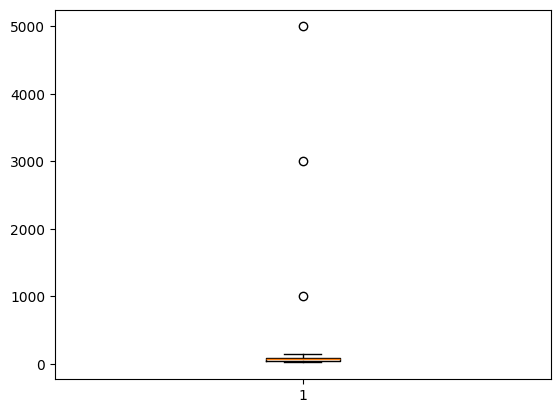

In [8]:
import matplotlib.pyplot as plt
plt.boxplot(x=[dataset["Total Marks"]])
plt.show()

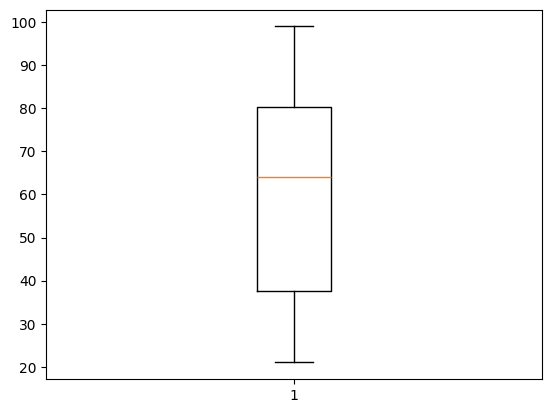

In [9]:
ndataset = dataset[dataset["Total Marks"]<100]
plt.boxplot(x=ndataset["Total Marks"])
plt.show()


### 3. Apply data transformations on at least one of the variables. The purpose of this transformation should be one of the following reasons: to change the scale for better understanding of the variable, to convert a non-linear relation into a linear one, or to decrease the skewness and convert the distribution into a normal distribution. Reason and document your approach properly.

In [12]:
dataset

,Student ID,Student Name,Age,Total Marks,Gender,Division
0,1,Stud 1,25.0,86.0,Male,B
1,2,Stud 2,23.0,1000.0,Female,C
2,3,Stud 3,20.0,3000.0,Female,B
3,4,Stud 4,22.0,5000.0,Male,A
4,5,Stud 5,21.0,36.0,Male,D
...,...,...,...,...,...,...
95,96,Stud 96,21.0,39.0,Female,C
96,97,Stud 97,24.0,34.0,Male,D
97,98,Stud 98,25.0,25.0,Male,D
98,99,Stud 99,21.0,72.0,Male,B


#### Scaling

<Axes: xlabel='Total Marks', ylabel='Count'>

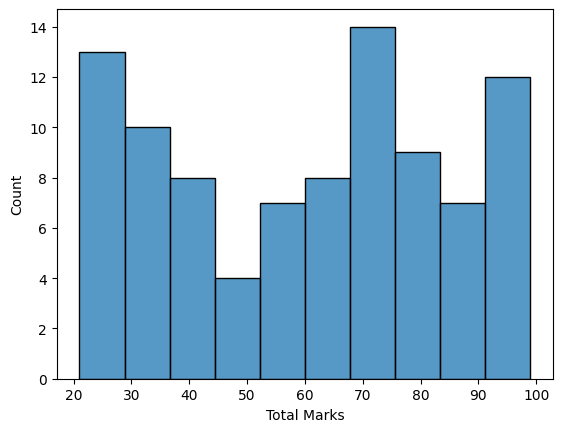

In [32]:
import seaborn as sns
sns.histplot(x='Total Marks', data = ndataset, bins=10)

0     4.454347
4     3.583519
5     3.526361
6     4.127134
7     4.418841
        ...   
95    3.663562
96    3.526361
97    3.218876
98    4.276666
99    4.007333
Name: Total Marks, Length: 92, dtype: float64

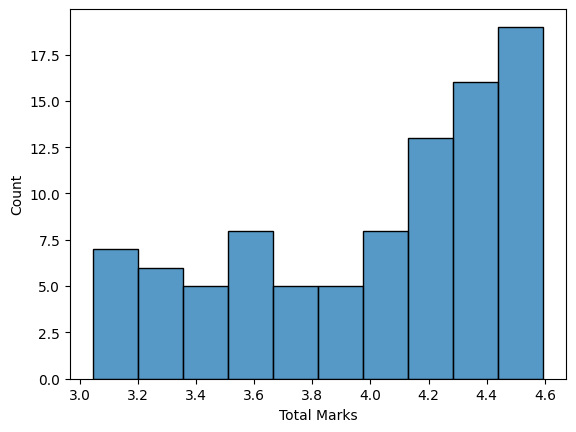

In [34]:
datalog = np.log(ndataset["Total Marks"])
sns.histplot(x=datalog, data = ndataset, bins=10)
datalog